In [1]:
# Implement Image classification using convolutional neural networks (CNNs) for multiclass classification.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:
(x_images, x_labels), (y_images, y_labels) = cifar10.load_data()

In [4]:
model = Sequential()

In [5]:
x_images , y_images = x_images/255.0 , y_images/255.0

In [6]:
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(2,2))

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

In [8]:
model.add(Conv2D(64,(3,3), activation = 'relu'))

In [9]:
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10))

In [19]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [20]:
model.fit(x_images, x_labels, epochs=10, validation_data=(y_images,y_labels))  

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.3372 - loss: 1.7852 - val_accuracy: 0.5570 - val_loss: 1.2436
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5686 - loss: 1.2075 - val_accuracy: 0.6141 - val_loss: 1.0845
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6384 - loss: 1.0292 - val_accuracy: 0.6359 - val_loss: 1.0168
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6791 - loss: 0.9213 - val_accuracy: 0.6774 - val_loss: 0.9219
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7058 - loss: 0.8430 - val_accuracy: 0.6667 - val_loss: 0.9586
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7238 - loss: 0.7812 - val_accuracy: 0.6905 - val_loss: 0.8906
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7452 - loss: 0.7263 - val_accuracy: 0.6904 - val_loss: 0.9083
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7634 -

In [23]:
test_loss, test_accu = model.evaluate(y_images, y_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7127 - loss: 0.8776


In [30]:
print("Accuracy :", test_accu)
print("loss :", test_loss)

Accuracy : 0.7092000246047974
loss : 0.8845191597938538


In [33]:
testing = model.predict(y_images[1].reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [34]:
print("accuracy :- " , testing[0])

accuracy :-  [  2.6991065   5.1771016  -9.150982   -2.9501421 -11.370083   -8.520237
 -10.552957   -9.71738     9.667635    2.4923608]


In [35]:
print("Class :- " , testing[0].argmax())

accuracy :-  8


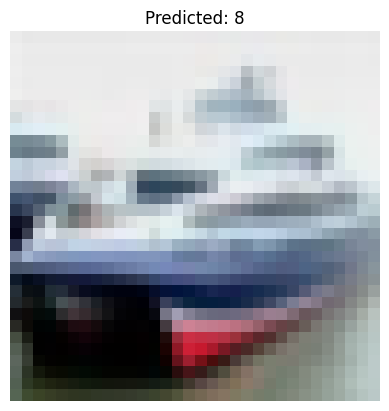

In [57]:
plt.imshow(y_images[1])
plt.title(f"Predicted: {y_labels[1][0]}")
plt.axis("off")
plt.show()

In [48]:
import numpy as np

In [50]:
all_labels = np.concatenate([x_labels, y_labels]).flatten()

In [51]:
print("Shape of all_labels:", all_labels.shape)
print("Class labels:", all_labels)

Shape of all_labels: (60000,)
Class labels: [6 9 9 ... 5 1 7]
